In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_yout = pd.read_csv('./data/USvideos.csv')

In [4]:
print(df_yout.shape)

(40949, 16)


In [6]:
print(df_yout.nunique())

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [8]:
print(df_yout.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [9]:
df_yout.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


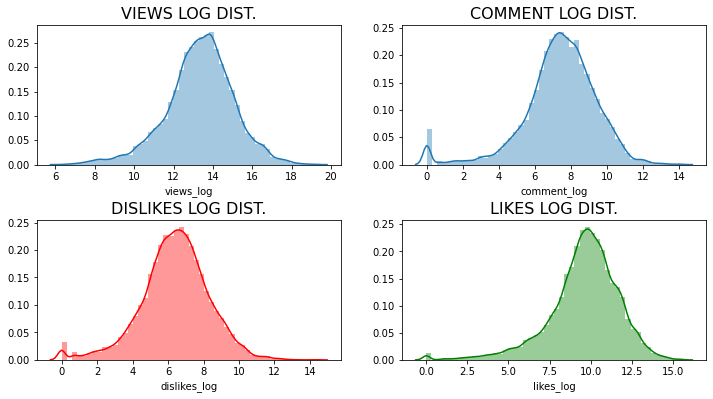

In [12]:
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)


plt.figure(figsize=(12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title('VIEWS LOG DIST.', fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DIST.', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title('DISLIKES LOG DIST.', fontsize=16)


plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'])
g4.set_title('COMMENT LOG DIST.', fontsize=16)

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)
plt.show()





In [13]:
print("Views quantiles")
print(df_yout['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_yout['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_yout['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_yout['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [14]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

In [15]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


## Looking the Views, likes, dislikes distribuition by category_name's

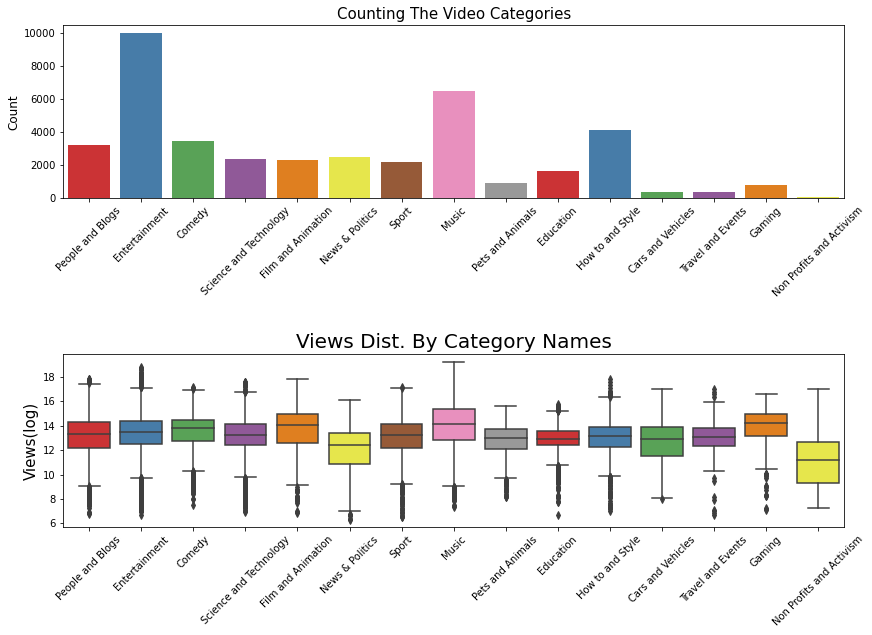

In [18]:
plt.figure(figsize=(14,9))

plt.subplot(211)
g = sns.countplot('category_name',data=df_yout, palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Counting The Video Categories', fontsize=15)
g.set_xlabel('',fontsize=12)
g.set_ylabel('Count',fontsize=12)


plt.subplot(212)
g1 = sns.boxplot(x='category_name',y='views_log',data=df_yout,palette='Set1')
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title('Views Dist. By Category Names',fontsize=20)
g1.set_xlabel('',fontsize=15)
g1.set_ylabel('Views(log)',fontsize=15)

plt.subplots_adjust(hspace=0.9,top=0.9)

plt.show()


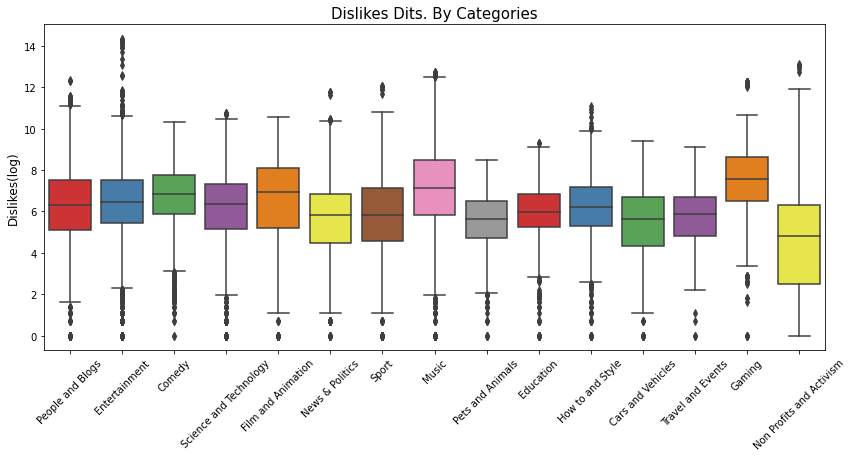

In [20]:
plt.figure(figsize=(14,6))

g = sns.boxplot(x='category_name',y='dislikes_log',data=df_yout,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Dislikes Dits. By Categories', fontsize=15)
g.set_xlabel('',fontsize=12)
g.set_ylabel('Dislikes(log)',fontsize=12)

plt.show()

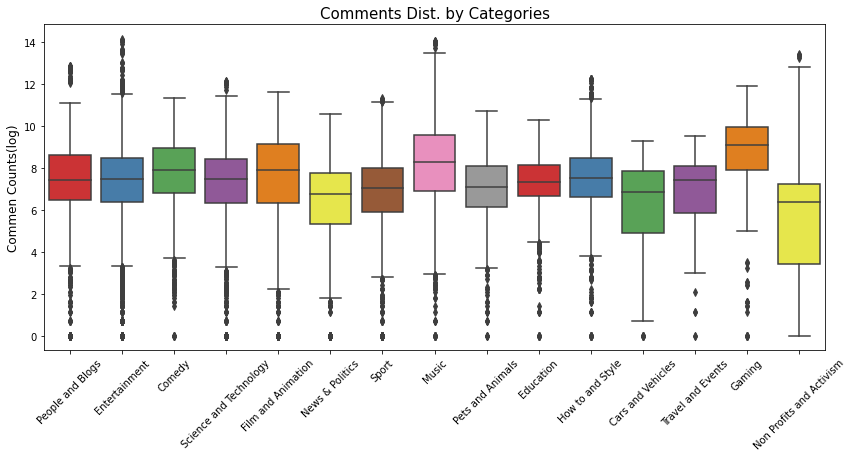

In [22]:
plt.figure(figsize=(14,6))

g = sns.boxplot(x='category_name',y='comment_log',data=df_yout,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Comments Dist. by Categories',fontsize=15)
g.set_xlabel('',fontsize=12)
g.set_ylabel('Commen Counts(log)',fontsize=12)

plt.show()

## Engagement Features

In [27]:
df_yout['like_rate'] =  df_yout['likes'] / df_yout['views'] * 100
df_yout['dislike_rate'] =  df_yout['dislikes'] / df_yout['views'] * 100
df_yout['comment_rate'] =  df_yout['comment_count'] / df_yout['views'] * 100

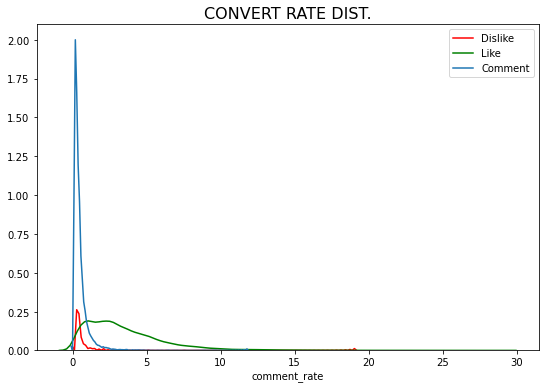

In [29]:
plt.figure(figsize=(9,6))

g1 = sns.distplot(df_yout['dislike_rate'], color='red', hist=False,label='Dislike')
g1 = sns.distplot(df_yout['like_rate'],color='green',hist=False,label='Like')
g1 = sns.distplot(df_yout['comment_rate'],hist=False,label='Comment')
g1.set_title('CONVERT RATE DIST.',fontsize=16)
plt.legend()
plt.show()

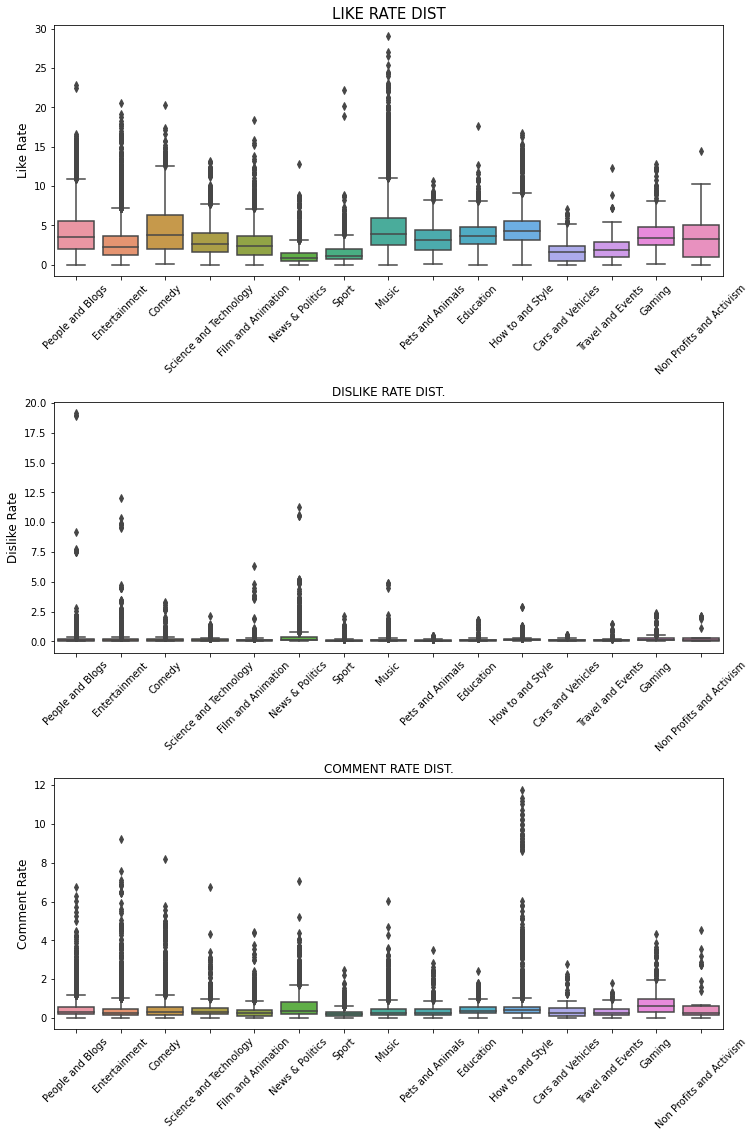

In [32]:
plt.figure(figsize=(12,18))


plt.subplot(311)

g = sns.boxplot(x='category_name',y='like_rate',data=df_yout)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('LIKE RATE DIST',fontsize=15)
g.set_xlabel('',fontsize=12)
g.set_ylabel('Like Rate',fontsize=12)


plt.subplot(312)
g1 = sns.boxplot(x='category_name',y='dislike_rate',data=df_yout)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title('DISLIKE RATE DIST.')
g1.set_xlabel('',fontsize=12)
g1.set_ylabel('Dislike Rate',fontsize=12)

plt.subplot(313)
g2 = sns.boxplot(x='category_name',y='comment_rate',data=df_yout)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title('COMMENT RATE DIST.')
g2.set_xlabel('',fontsize=12)
g2.set_ylabel('Comment Rate',fontsize=12)


plt.subplots_adjust(wspace=0.2,hspace=0.5,top=0.9)

plt.show()

## Looking through the anothers categoricals variables
* We have the variables:
* Comments Disable
* Rating disable
* Video error

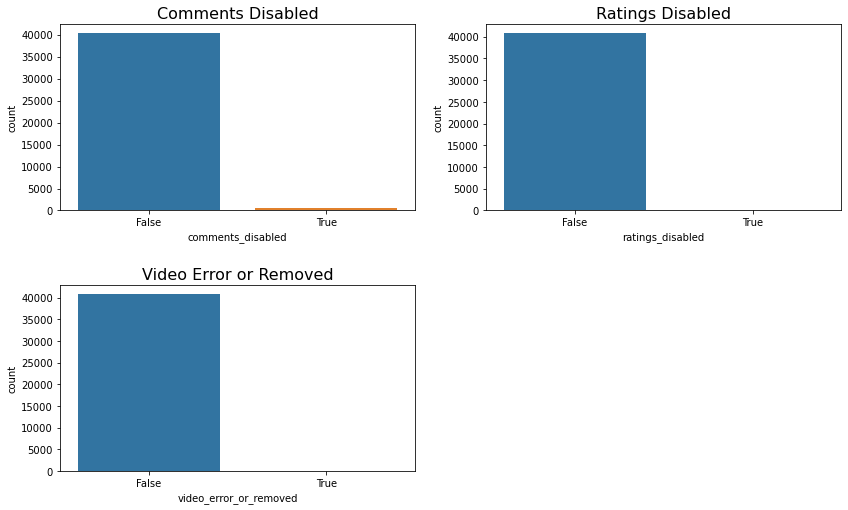

In [35]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled',data=df_yout)
g.set_title('Comments Disabled',fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled',data=df_yout)
g1.set_title('Ratings Disabled',fontsize=16) 

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed',data=df_yout) 
g2.set_title('Video Error or Removed',fontsize=16)

plt.show()


## Let's look the kde of this variables separated to deep understand them

/Users/kaancetindag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/kaancetindag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/kaancetindag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


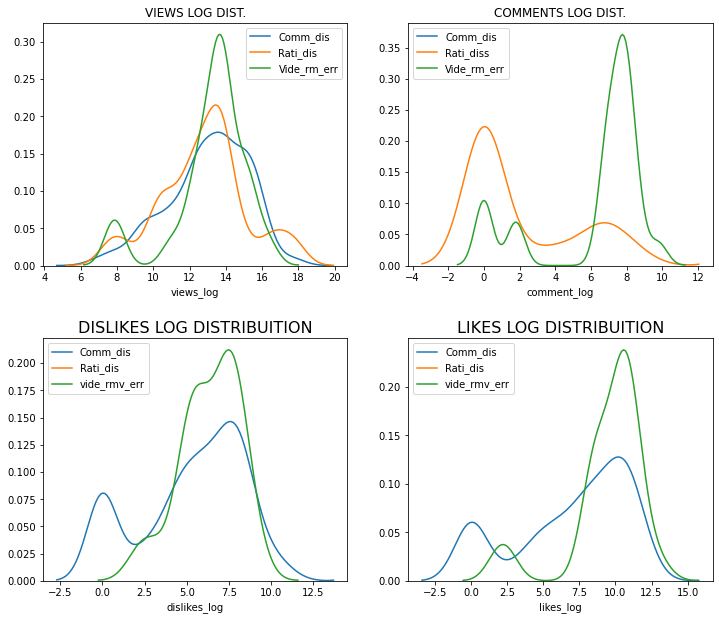

In [36]:
plt.figure(figsize=(12,10))

plt.subplot(221)
g1 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['views_log'],
                 hist=False,label='Comm_dis')
g1 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['views_log'],
                 hist=False,label='Rati_dis')
g1 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['views_log'],
                 hist=False,label='Vide_rm_err')
g1.set_title('VIEWS LOG DIST.')

plt.subplot(222)
g2 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['comment_log'],
                 hist=False,label='Comm_dis')
g2 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['comment_log'],
                 hist=False,label='Rati_diss')
g2 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['comment_log'],
                 hist=False,label='Vide_rm_err')
g2.set_title('COMMENTS LOG DIST.')

plt.subplot(223)
g3 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()


## Analysing the Correlation Matrix of the numerical variables

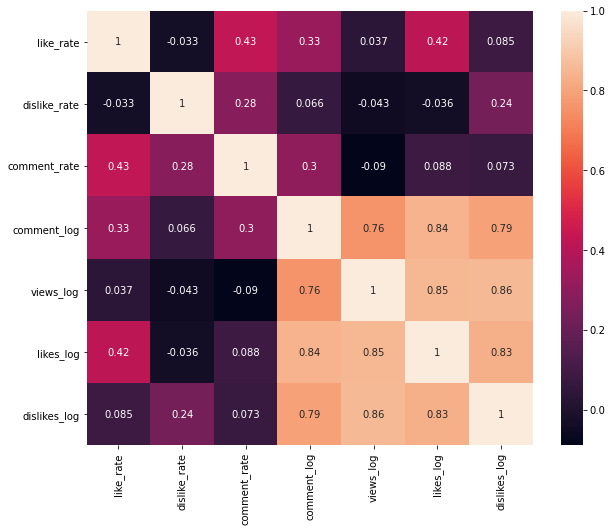

In [37]:
plt.figure(figsize=(10,8))

fancy = ['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]

sns.heatmap(df_yout[fancy].corr(),annot=True)

plt.show()

# NLP

In [38]:
#nlp
import string
import re #for regex
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [39]:
#Setting stopwords
eng_stopwords = set(stopwords.words('english'))

In [44]:
#Word count for each comment
df_yout['count_word'] = df_yout['title'].apply(lambda x: len(str(x).split()))
df_yout['count_word_tags'] = df_yout['tags'].apply(lambda x: len(str(x).split()))

#Unique word count
df_yout['count_unique_word'] = df_yout['title'].apply(lambda x: len(set(str(x).split())))
df_yout['count_unique_word_tags'] = df_yout['tags'].apply(lambda x: len(set(str(x).split())))

#Letter count
df_yout['count_letters'] = df_yout['title'].apply(lambda x: len(str(x)))
df_yout['count_letters_tags'] = df_yout['tags'].apply(lambda x: len(str(x)))


#Punctuation Count
df_yout["count_punctuations"] =df_yout["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_yout["count_punctuations_tags"] =df_yout["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_yout["count_words_upper"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_yout["count_words_upper_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_yout["count_words_title"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_yout["count_words_title_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_yout["count_stopwords"] = df_yout["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_yout["count_stopwords_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_yout["mean_word_len"] = df_yout["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_yout["mean_word_len_tags"] = df_yout["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [45]:
#derived features
#Word count percent in each comment:
df_yout['word_unique_percent']=df_yout['count_unique_word']*100/df_yout['count_word']
df_yout['word_unique_percent_tags']=df_yout['count_unique_word_tags']*100/df_yout['count_word_tags']

#Punct percent in each comment:
df_yout['punct_percent']=df_yout['count_punctuations']*100/df_yout['count_word']
df_yout['punct_percent_tags']=df_yout['count_punctuations_tags']*100/df_yout['count_word_tags']

/Users/kaancetindag/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


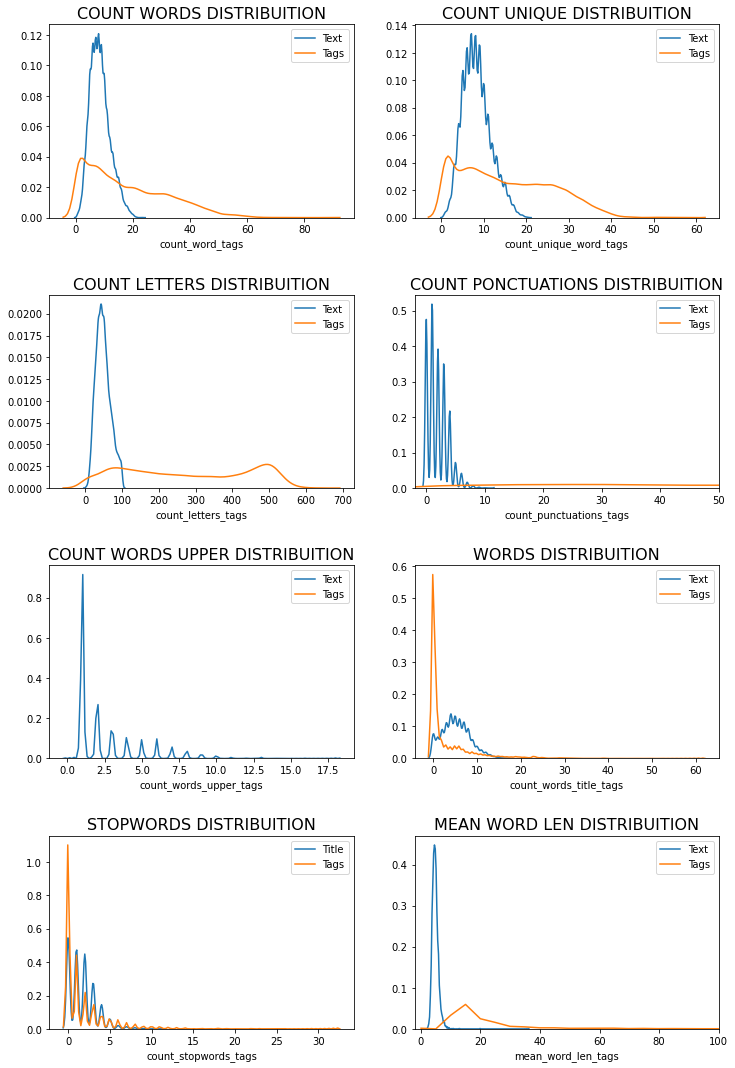

In [46]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_yout['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_yout['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_yout['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_yout['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_yout['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_yout['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_yout["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_yout["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_yout["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_yout["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_yout["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_yout["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_yout["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_yout["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_yout["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_yout["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

## Have the Punctuations title and tags any relation with views, likes, dislikes comments?

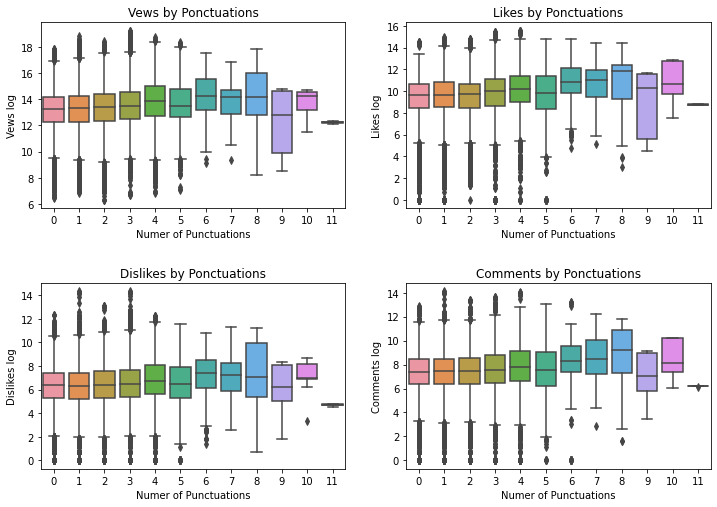

In [48]:

plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_yout)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_yout)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_yout)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df_yout)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

## The same view using Tags punctuations values

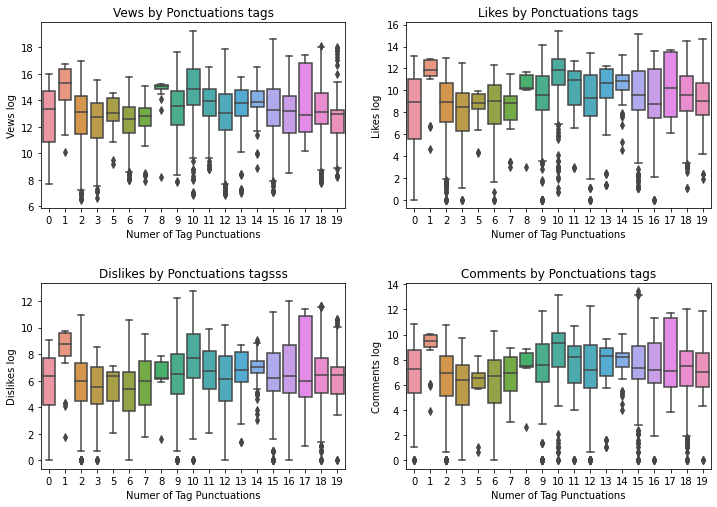

In [49]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

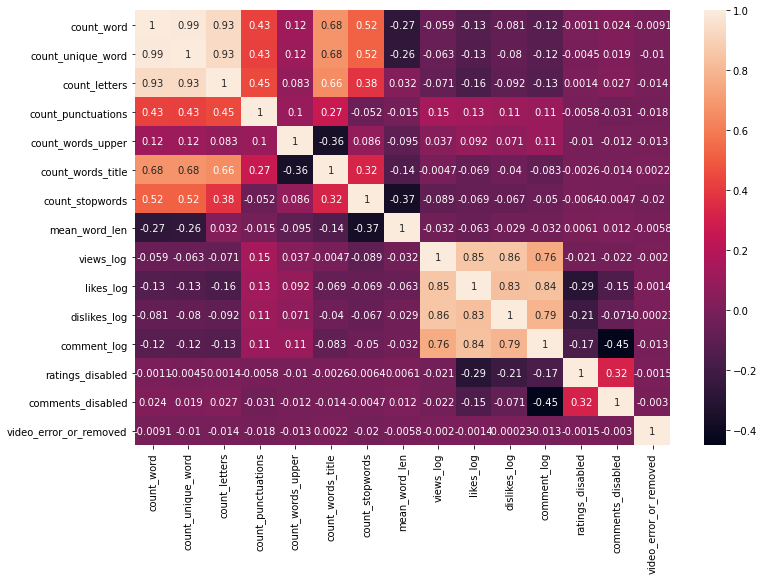

In [50]:
plt.figure(figsize = (12,8))

sns.heatmap(df_yout[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

In [51]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1

## Rating Disabled


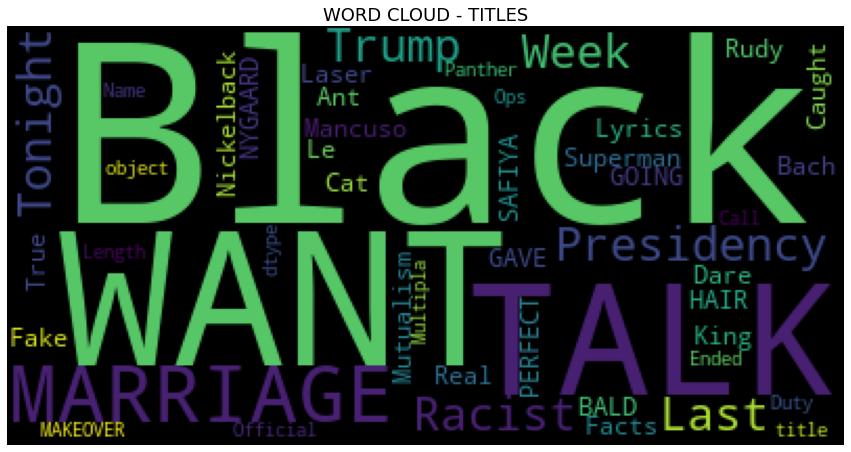

In [52]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

## General Title Word Cloud

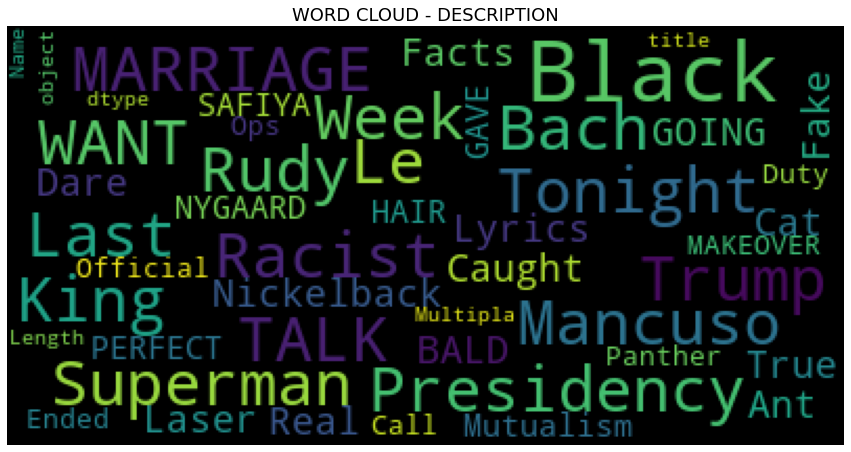

In [53]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

## Visualizing the WordCloud of Description

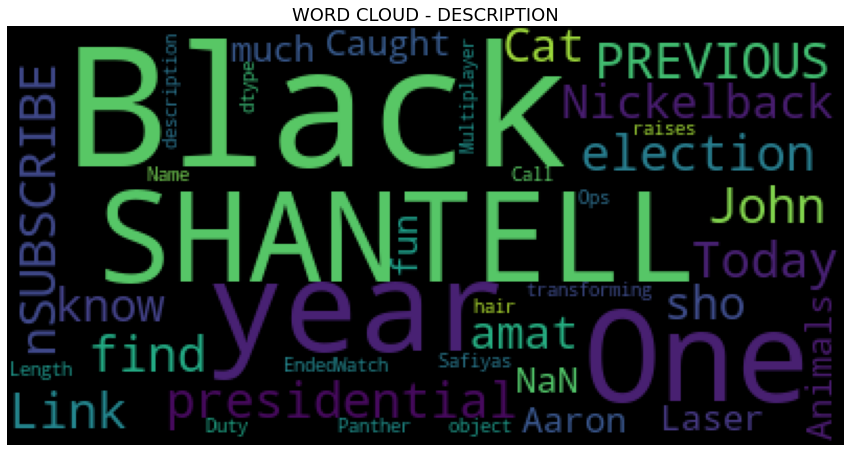

In [54]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_yout['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()